# <span style='background :orange' > Progetto di Data Visualization e Data Manipulation </span>

### <span style='font-family:"font_family name"'> <span styel=''> In questo progetto andrò ad analizzare in particolare il dataset  del Washigton Post (in continuo aggiornamento) creato a partire dal gennaio 2015 che contiene i dati relativi alle uccisioni commesse dalla polizia degli Stati Uniti. Unirò alla mia analisi altri dataset pubblici di Kaggle che contengono dati a carattere sociale riguardanti la popolazione statunitense. L'obiettivo finale sarà quello di provare a capire se c'è qualche tipo di pregiudizio razziale negli omicidi
  

# [1. Introduzione generale](#1)
# [2. Correlazione sociale](#2)
# [3. Analisi uccisioni per etnia](#3)
# [4. Conclusione](#4)




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from plotly import express as px
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

In [2]:
url1='https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv'
df=pd.read_csv(url1,parse_dates=True,index_col='date')
url2='https://drive.google.com/uc?id=1kEikaWCZYVO3ygVvAuVqxYqQPaVJrdYb'
population=pd.read_csv(url2)
median_household_income=pd.read_csv('C:\Users\Fiacco\Desktop\MedianHouseholdIncome2015.csv')
percentage_poverty=pd.read_csv('C:\Users\Fiacco\Desktop\PercentagePeopleBelowPovertyLevel.csv')
percent_complete_school=pd.read_csv('C:\Users\Fiacco\Desktop\PercentOver25CompletedHighSchool.csv')
share_race=pd.read_csv('C:\Users\Fiacco\Desktop\ShareRaceByCity.csv')

# <a id =1> </a> <br> Introduzione generale

In [3]:
df.head()

id                name   manner_of_death       armed   age gender  \
date                                                                            
2015-01-02   3          Tim Elliot              shot         gun  53.0      M   
2015-01-02   4    Lewis Lee Lembke              shot         gun  47.0      M   
2015-01-03   5  John Paul Quintero  shot and Tasered     unarmed  23.0      M   
2015-01-04   8     Matthew Hoffman              shot  toy weapon  32.0      M   
2015-01-04   9   Michael Rodriguez              shot    nail gun  39.0      M   

           race           city state  signs_of_mental_illness threat_level  \
date                                                                         
2015-01-02    A        Shelton    WA                     True       attack   
2015-01-02    W          Aloha    OR                    False       attack   
2015-01-03    H        Wichita    KS                    False        other   
2015-01-04    W  San Francisco    CA                     True       attack   
2015-01-04    H          Evans    CO                    False       attack   

                   flee  body_camera  longitude  latitude  is_geocoding_exact  
date                                                                           
2015-01-02  Not fleeing        False   -123.122    47.247                True  
2015-01-02  Not fleeing        False   -122.892    45.487                True  
2015-01-03  Not fleeing        False    -97.281    37.695                True  
2015-01-04  Not fleeing        False   -122.422    37.763                True  
2015-01-04  Not fleeing        False   -104.692    40.384                True

In [4]:
#conteggio dati nulli e la sua percentuale
count=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().mean()*100).sort_values(ascending=False)
missing_values=pd.DataFrame({'percent':percent,'count':count})
missing_values

count    percent
race                      1323  18.193069
latitude                   711   9.777228
longitude                  711   9.777228
flee                       653   8.979648
age                        413   5.679318
name                       353   4.854235
armed                      209   2.874037
gender                       7   0.096260
is_geocoding_exact           0   0.000000
body_camera                  0   0.000000
threat_level                 0   0.000000
signs_of_mental_illness      0   0.000000
state                        0   0.000000
city                         0   0.000000
manner_of_death              0   0.000000
id                           0   0.000000

In [5]:
# eliminazione dati inutili e sostituzione valori mancanti
df.dropna(how='all')
df.drop(['id','name'],axis=1,inplace=True)
df['armed'].fillna('Unkown',inplace=True)
df['flee'].fillna('Unkown',inplace=True)
df['race'].fillna('Unkown',inplace=True)
df['age'].fillna(df['age'].mean(),inplace=True)
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [6]:
# aggiustamenti di alcuni valori
df['age']=df['age'].astype(int)
df['race'] = df['race'].replace(['B','A', 'W', 'O', 'H', 'N'],
                                    ['Black', 'Asian', 'White', 'Other', 'Hispanic', 'Native America'])
df['gender']=df['gender'].replace(['D'],'F')
df['signs_of_mental_illness'] = df['signs_of_mental_illness'].replace({False:'No',True:'Yes'})
df['body_camera']=df['body_camera'].replace({False:'No',True:'Yes'})

In [7]:
# geolocalizzazione esatta e senza dati nulli
dfx = df[df['is_geocoding_exact']== True]
dfx=df[df['is_geocoding_exact'].notna()]

In [8]:
px.scatter_geo(dfx,lat='latitude',lon='longitude',scope='usa',hover_name='city',
               color=df['race'],animation_frame=dfx.index.year.astype('str'),
              title='Geolocalization cases ')

Iniziamo con un'analisi generale del fenomeno con un grafico della geolocalizzazione dei casi divisi sia per anno che per etnia 

Text(0.5,0.98,'Cases per year')

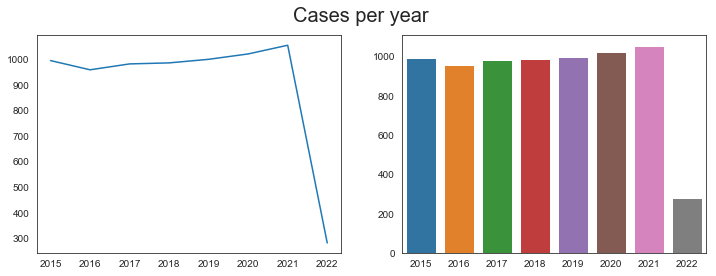

In [9]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
kill=(df.index.year.value_counts()).sort_index()
sns.lineplot(data=df, x=kill.index,y=kill.values,ax=ax[0])
sns.barplot(data=df,x=kill.index,y=kill.values,ax=ax[1])
fig.suptitle('Cases per year',fontsize=20)

Vediamo che non ci sono grandi differenze tra il numero delle vittime totali nel corso degli anni, tranne per l'anno ancora in corso dove ovviamente i dati sono parziali

In [10]:
# dataframe con il numero di vittime per stato
states_vict=df['state'].value_counts()
states_cases=pd.DataFrame({'state':states_vict.index,'cases':(states_vict.values)})

In [11]:
fig=px.choropleth(states_cases,locations='state', locationmode='USA-states', color='cases',
             range_color=(states_cases['cases'].min(),states_cases['cases'].max()),
              scope='usa',
              color_continuous_scale='spectral_r',
              title='Cases map')
fig.show()

In questa mappa abbiamo una divisione cromatica degli stati in base al numero delle vittime di questo. Lo stato con più casi è la California con più di 1000, segue il Texas e poi la Florida

[Text(0.5,1,'Top cities cases')]

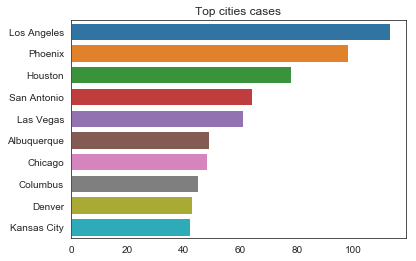

In [12]:
city_vict=df.city.value_counts()
sns.barplot(y=city_vict[:10].index,x=city_vict[:10].values).set(title='Top cities cases')

Queste invece sono le 10 città con più omicidi da parte della polizia, in testa c'è Los Angeles

[Text(0.5,1,'Ages distribution by sex')]

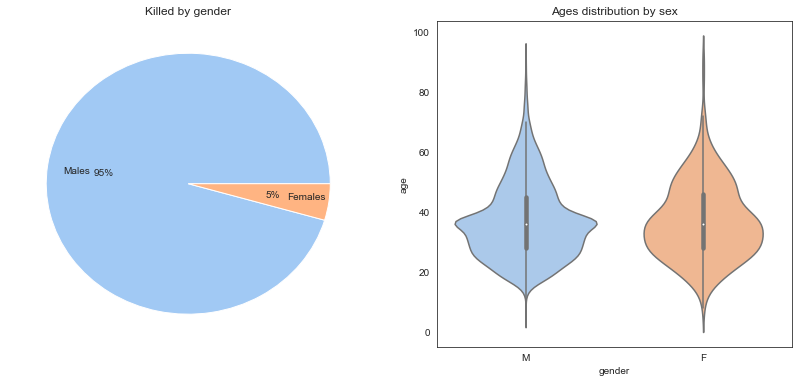

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize = (14,6))
ax1.pie(df['gender'].value_counts(), colors=sns.color_palette('pastel'), labels =['Males', 'Females'] , autopct='%.0f%%',labeldistance=0.7)
ax1.set_title('Killed by gender')
sns.violinplot(data=df, x="gender", y="age", palette="pastel").set(title="Ages distribution by sex")

Per concludere questa introduzione vediamo nel grafico di sinistra che la maggior parte del vittime sono di sesso maschile(95%),mentre in quello di destra vediamo come però tra i sessi non ci sono evidenti differenze per quanto riguarda l'età di queste ultime (maggior numero di vittime tra i 30 e 40 anni). 
Andiamo a vedere se ci sono correlazioni a carattere sociale tra gli omicidi

# <a id =2> </a> <br> Correlazione sociale

In [14]:
median_household_income.head()

Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667

In [15]:
percentage_poverty.head()

Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42

In [16]:
percent_complete_school.head()

Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6

In [17]:
# rinomino alcune colonne
median_household_income.rename(columns={'Geographic Area':'state','City':'city'}, inplace=True)
percentage_poverty.rename(columns={'Geographic Area':'state','City':'city'}, inplace=True)
percent_complete_school.rename(columns={'Geographic Area':'state','City':'city'}, inplace=True)

In [18]:
# unisco i 3 dataset in uno creato
society=pd.DataFrame(columns=['state','city'])
for data in (median_household_income, percent_complete_school, percentage_poverty):
    society=society.merge(data, on=["state",'city'], how='outer')

society.head()

state             city Median Income percent_completed_hs poverty_rate
0    AL       Abanda CDP         11207                 21.2         78.8
1    AL   Abbeville city         25615                 69.1         29.1
2    AL  Adamsville city         42575                 78.9         25.5
3    AL     Addison town         37083                 81.4         30.7
4    AL       Akron town         21667                 68.6           42

In [19]:
# casi per stato e città
cases=df.groupby(['state','city']).count()['gender'].reset_index()
cases.columns=['state','city','cases']
cases.head()

state           city  cases
0    AK   Anchor Point      1
1    AK      Anchorage     11
2    AK         Barrow      1
3    AK       Big Lake      1
4    AK  Copper Center      1

In [20]:
# unisco anche il numero di casi
society['city'] = society['city'].apply(lambda x: x.rsplit(' ',1)[0])
society=society.merge(cases,on=['state','city'],how='left')
society.head()

state        city Median Income percent_completed_hs poverty_rate  cases
0    AL      Abanda         11207                 21.2         78.8    NaN
1    AL   Abbeville         25615                 69.1         29.1    1.0
2    AL  Adamsville         42575                 78.9         25.5    NaN
3    AL     Addison         37083                 81.4         30.7    NaN
4    AL       Akron         21667                 68.6           42    NaN

In [21]:
society.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29331 entries, 0 to 29330
Data columns (total 6 columns):
state                   29331 non-null object
city                    29331 non-null object
Median Income           29271 non-null object
percent_completed_hs    29329 non-null object
poverty_rate            29329 non-null object
cases                   2690 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


In [22]:
society.isnull().sum()

state                       0
city                        0
Median Income              60
percent_completed_hs        2
poverty_rate                2
cases                   26641
dtype: int64

In [23]:
#society['poverty_rate'].value_counts()
#society['Median Income'].value_counts()
#society['percent_completed_hs'].value_counts()
#society['cases'].value_counts()

In [24]:
#sostituzione valori nulli o sbagliati
society.fillna(0.0,inplace=True)
for column in ("poverty_rate", "percent_completed_hs",'Median Income'):
    society[column].replace(["(X)","-","2,500-","250,000+"], "0.0", inplace=True)
    society[column]=society[column].astype(float)

Text(0.5,1,'Cases on median income')

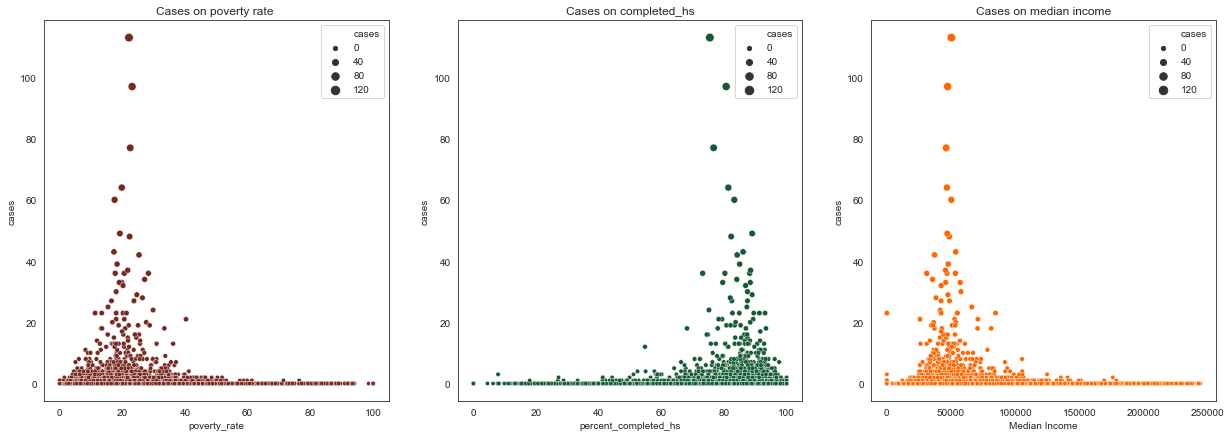

In [25]:
fig, axes = plt.subplots(1,3,figsize=(21, 7))
sns.scatterplot(y='cases', x='poverty_rate', data=society, ax=axes[0], color='#78281F', size='cases',linewidth=0.4)
sns.scatterplot(y='cases', x='percent_completed_hs', data=society, ax=axes[1], color='#145A32', size='cases',linewidth=0.4)
sns.scatterplot(y='cases', x='Median Income', data=society, ax=axes[2], color='#FF6600', size='cases',linewidth=0.4)
axes[0].set_title('Cases on poverty rate ')
axes[1].set_title('Cases on completed_hs')
axes[2].set_title('Cases on median income')

In questi grafici vediamo alcune correlazioni tra le vittime e alcune caratteristiche sociali, in particolare abbiamo rispettivamente partendo da sinistra la relazione tra i casi con la povertà media, con la percentuale che ha completato la high school e quindi infine con il reddito medio.

I casi si concentrano nelle città dove: la povertà media è intorno al 20%, la percentuale di persone che hanno completato la high school è superiore al 80% e il reddito medio annuo è intorno a 50000

# <a id =3> </a> <br> Analisi uccisioni per etnia

In [26]:
population.head()

city state  population      lat       lng
0   Anchor Point    AK      2057.0  59.7703 -151.7052
1      Anchorage    AK    253421.0  61.1508 -149.1091
2         Barrow    AK      4178.0      NaN       NaN
3       Big Lake    AK      3136.0  61.5260 -149.9721
4  Copper Center    AK       397.0  61.9845 -145.3544

In [27]:
share_race.head()

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3

In [28]:
# dataframe con la popolazione per stato
states=pd.DataFrame(columns=['state'])
population_state=population.groupby(['state'])['population'].sum()
states=states.merge(population_state, on=["state"], how='outer')

In [29]:
states.head()

state  population
0    AK    387478.0
1    AL   2750534.0
2    AR   1616531.0
3    AZ   8250903.0
4    CA  49249138.0

In [30]:
# modifiche dataframe sulle razze
share_race.rename(columns={'Geographic area':'state'}, inplace=True)
share_race.drop(['City'],axis=1, inplace=True)
for column in ("share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"):
    share_race[column].replace("(X)", "0.0", inplace=True)
    share_race[column]=share_race[column].astype(float)

In [31]:
# unisco i 2 dataframe
share_race=share_race.groupby(['state']).mean().round(2)
states=states.merge(share_race, on=['state'],how='outer')

In [32]:
states.head()

state  population  share_white  share_black  share_native_american  \
0    AK    387478.0        45.26         0.56                  45.48   
1    AL   2750534.0        72.51        23.32                   0.66   
2    AR   1616531.0        78.45        16.30                   0.76   
3    AZ   8250903.0        59.93         0.95                  28.59   
4    CA  49249138.0        71.54         2.68                   1.72   

   share_asian  share_hispanic  
0         1.38            2.13  
1         0.48            2.98  
2         0.48            4.27  
3         0.73           20.14  
4         5.54           29.51

In [33]:
#dataframe con il numero di vittime per razza
count = pd.DataFrame(df.groupby("state")["race"].value_counts())
count = count.unstack().fillna(0)
count.columns = count.columns.droplevel(0)
count.head()

race   Asian  Black  Hispanic  Native America  Other  Unkown  White
state                                                              
AK       2.0    3.0       0.0            10.0    0.0     6.0   28.0
AL       0.0   37.0       3.0             0.0    0.0    22.0   76.0
AR       2.0   26.0       0.0             0.0    0.0    17.0   57.0
AZ       0.0   21.0      99.0            13.0    0.0    77.0  123.0
CA      35.0  159.0     383.0             4.0    8.0   210.0  261.0

In [34]:
# aggiungo colonna vittime totali
count["tot"] = count.apply(lambda x:x.sum(), axis=1)
count.head()

race   Asian  Black  Hispanic  Native America  Other  Unkown  White     tot
state                                                                      
AK       2.0    3.0       0.0            10.0    0.0     6.0   28.0    49.0
AL       0.0   37.0       3.0             0.0    0.0    22.0   76.0   138.0
AR       2.0   26.0       0.0             0.0    0.0    17.0   57.0   102.0
AZ       0.0   21.0      99.0            13.0    0.0    77.0  123.0   333.0
CA      35.0  159.0     383.0             4.0    8.0   210.0  261.0  1060.0

In [35]:
# unisco il dataframe sulla diffusione delle razze con quelle del conteggio delle vittime
states=states.merge(count,on=['state'],how='outer')

In [36]:
states.head()

state  population  share_white  share_black  share_native_american  \
0    AK    387478.0        45.26         0.56                  45.48   
1    AL   2750534.0        72.51        23.32                   0.66   
2    AR   1616531.0        78.45        16.30                   0.76   
3    AZ   8250903.0        59.93         0.95                  28.59   
4    CA  49249138.0        71.54         2.68                   1.72   

   share_asian  share_hispanic  Asian  Black  Hispanic  Native America  Other  \
0         1.38            2.13    2.0    3.0       0.0            10.0    0.0   
1         0.48            2.98    0.0   37.0       3.0             0.0    0.0   
2         0.48            4.27    2.0   26.0       0.0             0.0    0.0   
3         0.73           20.14    0.0   21.0      99.0            13.0    0.0   
4         5.54           29.51   35.0  159.0     383.0             4.0    8.0   

   Unkown  White     tot  
0     6.0   28.0    49.0  
1    22.0   76.0   138.0  
2    17.0   57.0   102.0  
3    77.0  123.0   333.0  
4   210.0  261.0  1060.0

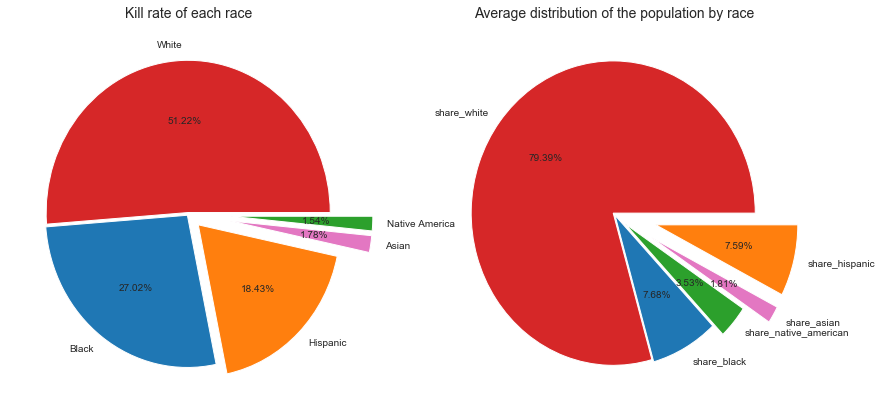

In [37]:
df = df[df['race'].isin(['White','Black','Hispanic','Native America','Asian'])]
races = df["race"].value_counts()
explode = [0.01, 0.01, 0.1, 0.3, 0.3] 
colors = ["tab:red","tab:blue","tab:orange","tab:pink","tab:green"]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))

labels = races.index
ax1.pie(races, labels=labels,explode=explode, autopct='%1.2f%%', colors=colors)
ax1.set_title("Kill rate of each race", fontsize=14)

col=["tab:red","tab:blue","tab:green","tab:pink","tab:orange"]            
lab = states[states.columns[2:7]].sum().index
ax2.pie(states[states.columns[2:7]].sum(), labels=lab,explode=explode, autopct='%1.2f%%', colors=col)
ax2.set_title("Average distribution of the population by race", fontsize=14)
plt.show()

Iniziamo vedendo questi due grafici contrapposti, entrambi sono suddivisi per razza e rappresentano: il primo la percentuale di vittime mentre il secondo la percentuale di distribuzione.

Notiamo delle differenze evidenti, infatti nonostante la popolazione bianca rappresenti più del 50% delle vittime, in corrispondenza la sua distribuzione arriva ad essere quasi dell'80%.
Al contrario soprattutto nella la razza nera e in quella ispanica la percentuale di vittime risulta essere nettamente superiore rispetto alla distribuzione.

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

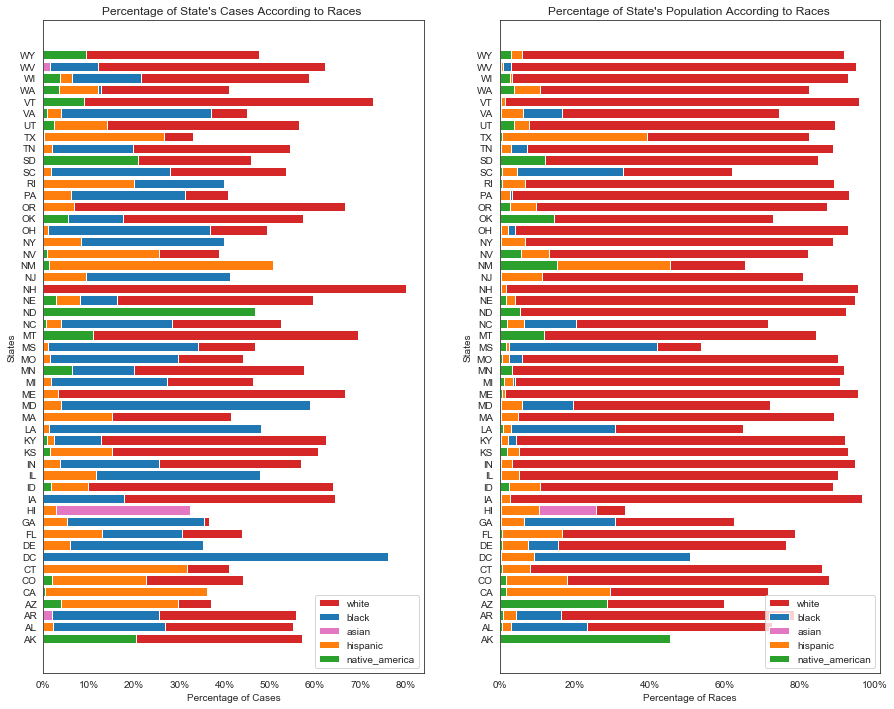

In [38]:
palette={'White':'tab:red','Black':'tab:blue','Asian':'tab:pink','Hispanic':'tab:orange', 'Native America':'tab:green'}
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 12))
ax1.barh( states['state'],states["White"]/states['tot']*100,color=palette['White'], label="white")
ax1.barh( states['state'],states["Black"]/states['tot']*100, color=palette['Black'],  label="black")
ax1.barh(states['state'],states["Asian"]/states['tot']*100, color=palette['Asian'],  label="asian")
ax1.barh( states['state'],states["Hispanic"]/states['tot']*100, color=palette['Hispanic'],  label="hispanic")
ax1.barh(states['state'],states["Native America"]/states['tot']*100, color=palette['Native America'], label="native_america")
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.legend(loc='lower right',frameon = True)     
ax1.set(xlabel='Percentage of Cases', ylabel='States',title = "Percentage of State's Cases According to Races ")
ax2.barh( states['state'],states["share_white"],color=palette['White'], label="white")
ax2.barh( states['state'],states["share_black"], color=palette['Black'],  label="black")
ax2.barh(states['state'],states["share_asian"], color=palette['Asian'],  label="asian")
ax2.barh( states['state'],states["share_hispanic"], color=palette['Hispanic'],  label="hispanic")
ax2.barh(states['state'],states["share_native_american"], color=palette['Native America'], label="native_american")
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(loc='lower right',frameon = True)     
ax2.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

Quello che abbiamo visto sopra, lo ritroviamo anche in questi due grafici con la differenza che in questo caso ci si sofferma su ogni singolo stato.
Anche qui le differenze sono evidenti, in percentuale anche qui le razze minoritarie sembrano essere le più colpite.

Vediamo alcune caratterestiche delle vittime e degli omicidi sempre in relazione alla razza

In [39]:
race_mental_illness=df.groupby('race')['signs_of_mental_illness'].value_counts(normalize = True).unstack(1).round(3)*100
race_mental_illness

signs_of_mental_illness    No   Yes
race                               
Asian                    74.3  25.7
Black                    84.5  15.5
Hispanic                 82.5  17.5
Native America           82.4  17.6
White                    71.1  28.9

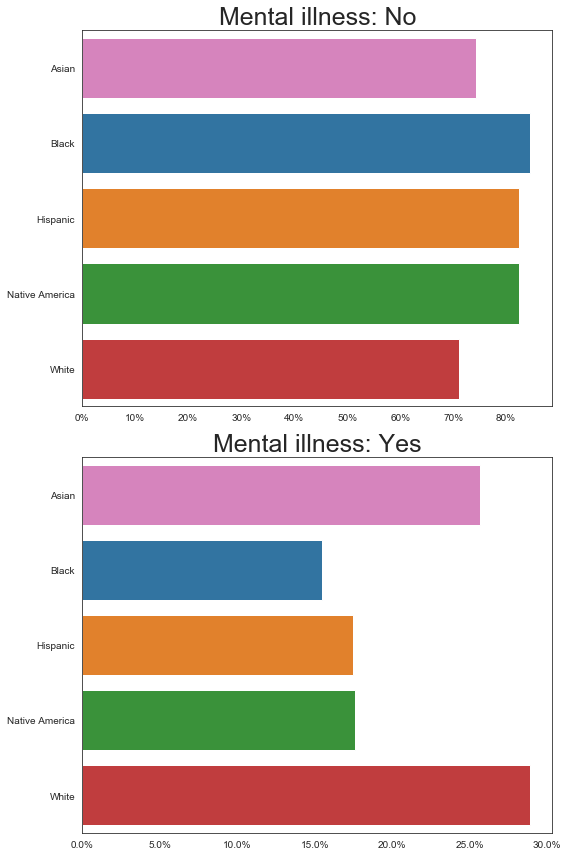

In [40]:
fig, axes = plt.subplots(2,1,figsize=(8, 12))
sns.barplot(x=race_mental_illness['No'],y=race_mental_illness.index.values,palette=palette,orient='h',ax=axes[0])
sns.barplot(x=race_mental_illness['Yes'],y=race_mental_illness.index.values,palette=palette,orient='h',ax=axes[1])
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Mental illness: No',fontsize=25)
axes[1].set_title('Mental illness: Yes', fontsize=25)
fig.tight_layout()

Tra le vittime quelle che presentano in maggioranza disturbi mentali sono i bianchi seguiti dagli asiatici, molto simile le altre etnie

In [41]:
df['armed']=np.where((df.armed != 'unarmed'),'armed',df.armed)
df['armed'].value_counts()

armed      5491
unarmed     411
Name: armed, dtype: int64

In [42]:
race_armed=df.groupby('race')['armed'].value_counts(normalize = True).unstack(1).round(3)*100
race_armed

armed           armed  unarmed
race                          
Asian            92.4      7.6
Black            91.2      8.8
Hispanic         92.6      7.4
Native America   93.4      6.6
White            94.1      5.9

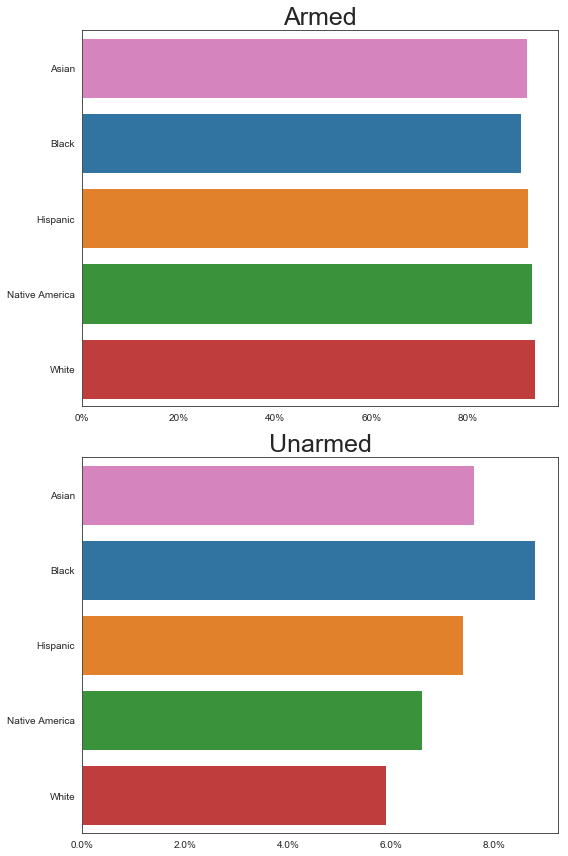

In [43]:
fig, axes = plt.subplots(2,1,figsize=(8, 12))
sns.barplot(x=race_armed['armed'],y=race_armed.index.values,palette=palette,orient='h',ax=axes[0])
sns.barplot(x=race_armed['unarmed'],y=race_armed.index.values,palette=palette,orient='h',ax=axes[1])
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Armed',fontsize=25)
axes[1].set_title('Unarmed', fontsize=25)
fig.tight_layout()

Per la stra grande maggioranza le vittime erano armate (più del 90%) e non ci sono grandi differenze tra le razze, anche se comunque notiamo una leggera prevalenza di casi di persone nere che erano disarmate

In [44]:
race_manner_of_death=df.groupby('race')['manner_of_death'].value_counts(normalize = True).unstack(1).round(3)*100
race_manner_of_death

manner_of_death  shot  shot and Tasered
race                                   
Asian            92.4               7.6
Black            94.5               5.5
Hispanic         94.8               5.2
Native America   94.5               5.5
White            95.3               4.7

Text(-0.08,0.5,'manner of death')

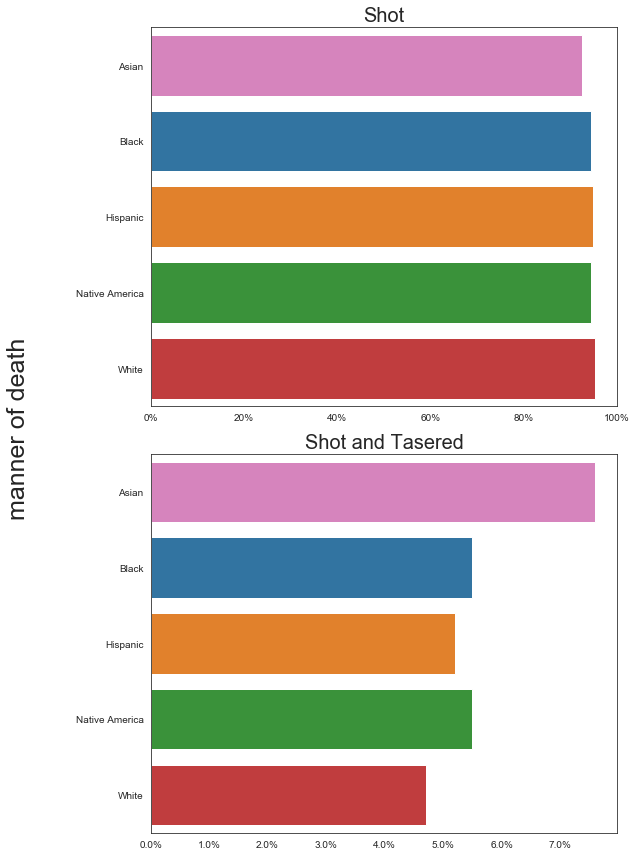

In [45]:
fig, axes = plt.subplots(2,1,figsize=(8, 12))
sns.barplot(x=race_manner_of_death['shot'],y=race_manner_of_death.index.values,palette=palette,orient='h',ax=axes[0])
sns.barplot(x=race_manner_of_death['shot and Tasered'],y=race_manner_of_death.index.values,palette=palette,orient='h',ax=axes[1])
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Shot',fontsize=20)
axes[1].set_title('Shot and Tasered', fontsize=20)
fig.tight_layout()
fig.text(-0.08,0.5, "manner of death", ha="center", va="center", rotation=90,fontsize=25)

In questo caso vediamo che quasi la totalità delle vittime sono state uccise con arma da fuoco, con una piccola percentuale che cresce nella pololazione asiatica per quanto riguarda l'utilizzo in aggiunta del taser

In [46]:
threat_level= df[df['threat_level'].isin(['attack','other'])]
race_threat_level=threat_level.groupby('race')['threat_level'].value_counts(normalize = True).unstack(1).round(3)*100
race_threat_level

threat_level    attack  other
race                         
Asian             52.9   47.1
Black             69.2   30.8
Hispanic          60.4   39.6
Native America    61.6   38.4
White             67.8   32.2

Text(-0.08,0.5,'Threat level')

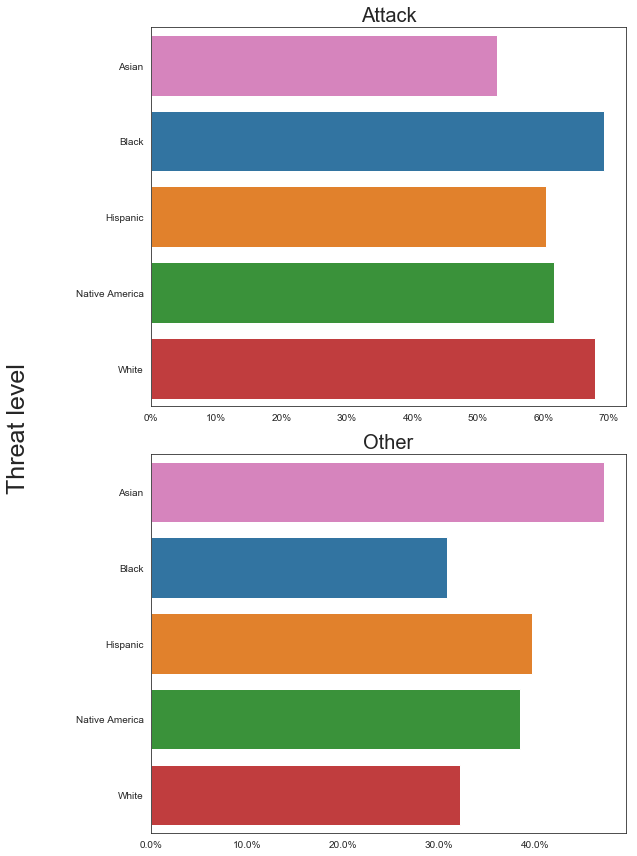

In [47]:
fig, axes = plt.subplots(2,1,figsize=(8, 12))
sns.barplot(x=race_threat_level['attack'],y=race_threat_level.index.values,palette=palette,orient='h',ax=axes[0])
sns.barplot(x=race_threat_level['other'],y=race_threat_level.index.values,palette=palette,orient='h',ax=axes[1])
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Attack',fontsize=20)
axes[1].set_title('Other', fontsize=20)
fig.tight_layout()
fig.text(-0.08,0.5, "Threat level", ha="center", va="center", rotation=90,fontsize=25)

Quando il livello di allerta era alto risulta essere molto simile tra i bianchi e neri, mentre è leggermente inferiore nelle altre etnie

In [48]:
flee= df[df['flee'].isin(['Car','Foot','Not fleeing','Other'])]
race_flee=flee.groupby('race')['flee'].value_counts(normalize = True).unstack(1).round(3)*100
race_flee['Fleeing']=race_flee['Car']+race_flee['Foot']+race_flee['Other']
race_flee

flee             Car  Foot  Not fleeing  Other  Fleeing
race                                                   
Asian           11.0  10.0         78.0    1.0     22.0
Black           16.5  21.1         58.3    4.1     41.7
Hispanic        17.7  15.0         62.0    5.3     38.0
Native America  12.5  21.2         61.2    5.0     38.7
White           17.6  10.3         68.6    3.5     31.4

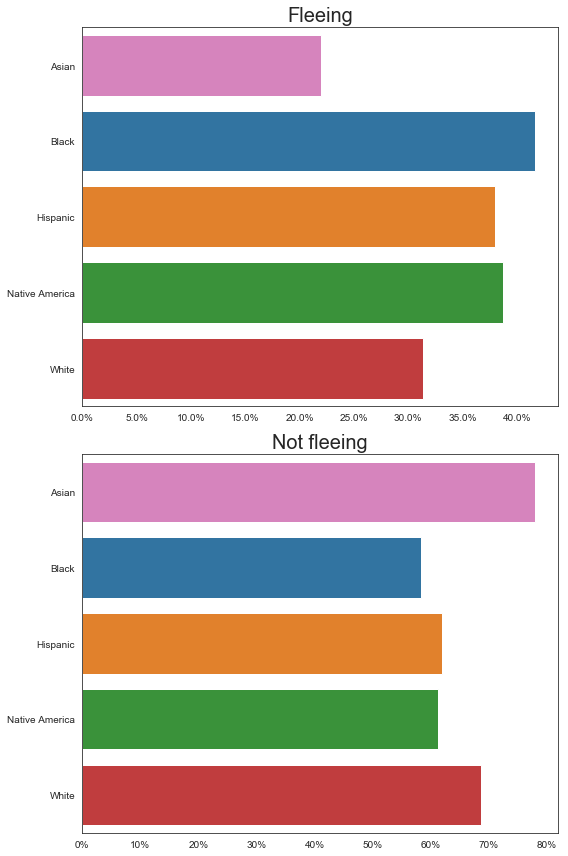

In [49]:
fig, axes = plt.subplots(2,1,figsize=(8, 12))
sns.barplot(x=race_flee['Fleeing'],y=race_flee.index.values,palette=palette,orient='h',ax=axes[0])
sns.barplot(x=race_flee['Not fleeing'],y=race_flee.index.values,palette=palette,orient='h',ax=axes[1])
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Fleeing',fontsize=20)
axes[1].set_title('Not fleeing', fontsize=20)
fig.tight_layout()

La razza nera risulta essere quella maggiormente in fuga durante l'omicidio (41%), mentre gli asiatici quella in maniera inferiore(21%)

In [50]:
race_body_camera=df.groupby('race')['body_camera'].value_counts(normalize = True).unstack(1).round(3)*100
race_body_camera

body_camera       No   Yes
race                      
Asian           80.0  20.0
Black           80.5  19.5
Hispanic        85.1  14.9
Native America  82.4  17.6
White           89.1  10.9

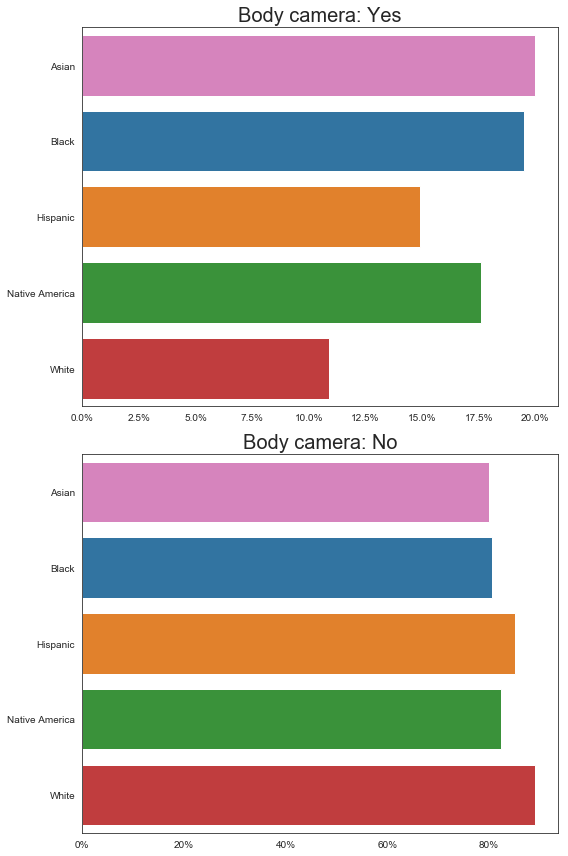

In [51]:
fig, axes = plt.subplots(2,1,figsize=(8, 12))
sns.barplot(x=race_body_camera['Yes'],y=race_body_camera.index.values,palette=palette,orient='h',ax=axes[0])
sns.barplot(x=race_body_camera['No'],y=race_body_camera.index.values,palette=palette,orient='h',ax=axes[1])
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_title('Body camera: Yes',fontsize=20)
axes[1].set_title('Body camera: No', fontsize=20)
fig.tight_layout()

Notiamo che nella maggior parte dei casi gli agenti che hanno commesso l'omicidio non avevano con se una videocamera che riprendesse il fatto. All'ultimo posto c'è la razza bianca con solo il 10%

# <a id =4> </a> <br> Conclusione

Per quanto riguarda questa analisi possiamo affermare che sicuramente in rapporto con la pololazione le etnie minoritarie hanno subito maggiori uccisioni da parte della polizia statunitense. Ci sono anche anche altre aspetti che abbiamo considerato che lasciano qualche perplessità sulla bontà delle azioni svolte dagli agenti e che rimandano comunque al dubbio che alcune di esse sia state mosse da pregiudizi razziali